In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning part

In [2]:
dt = pd.read_csv('./data/fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

In [3]:
pd.options.display.max_seq_items = 200
print("Dataframe shape : {}".format(dt.shape))

Dataframe shape : (320772, 162)


In [4]:
print(dt.info())
dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB
None


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [5]:
# Columns types

# pd.describe_option()
pd.options.display.max_rows = 200
pd.DataFrame({'types' : dt.dtypes.values}).groupby('types')['types'].count()

types
float64    106
object      56
Name: types, dtype: int64

106 columns are numerical, but 56 are objects (should be string or datetime)

### Missing values

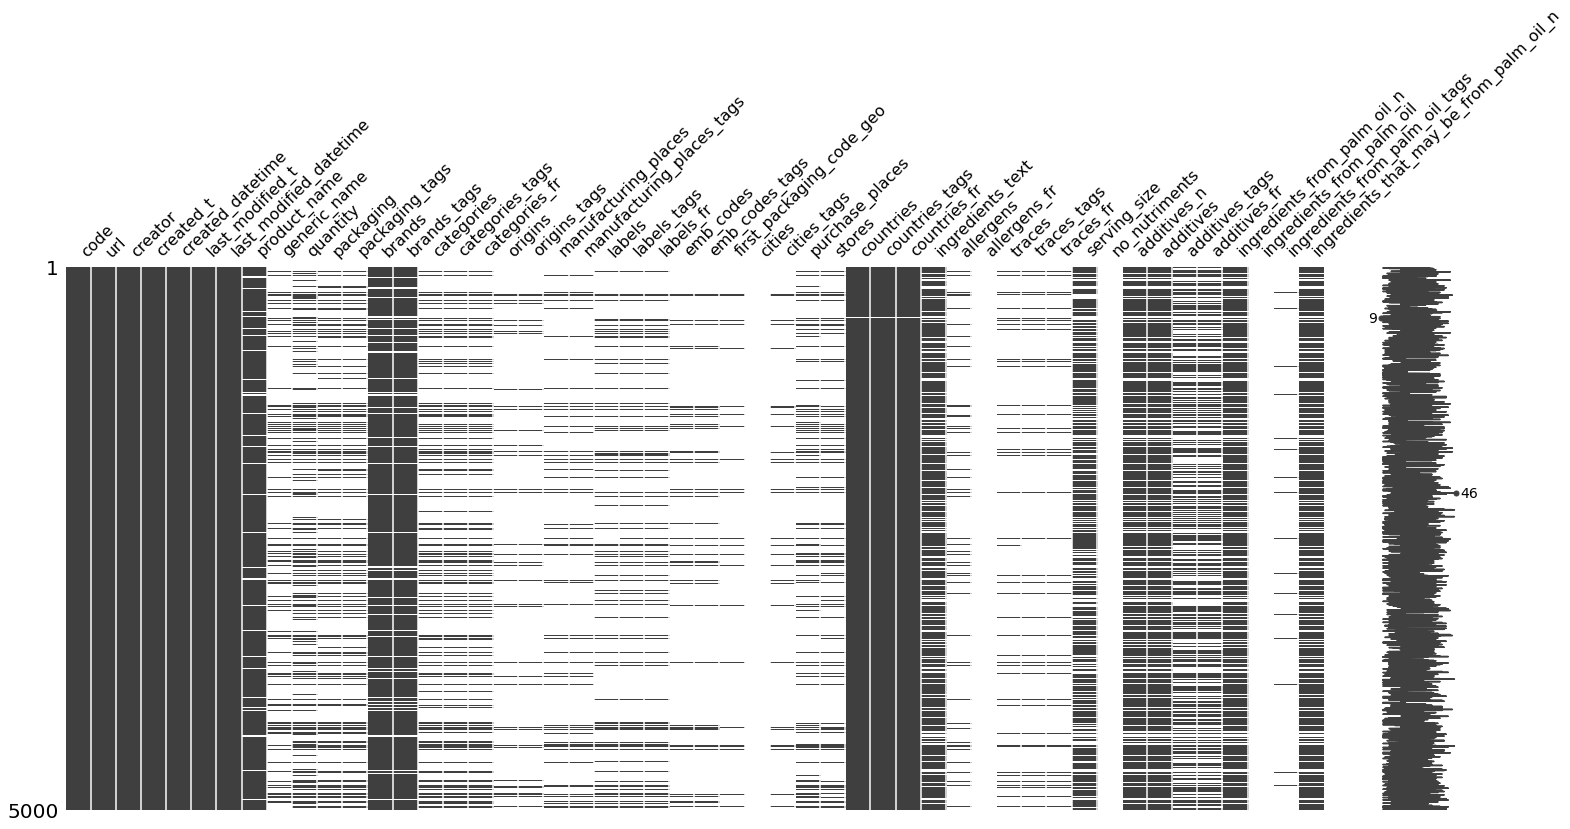

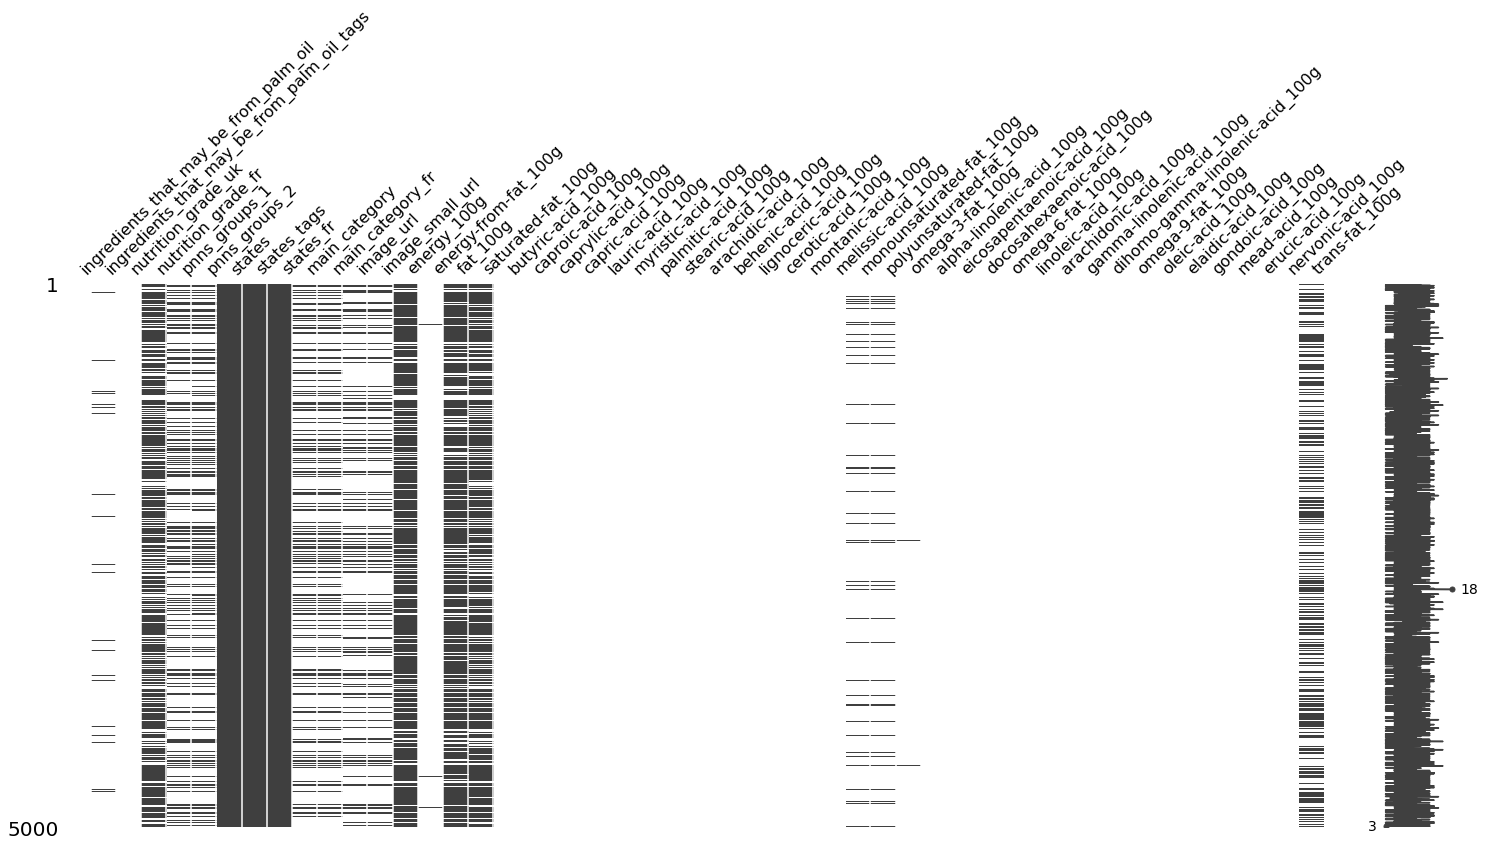

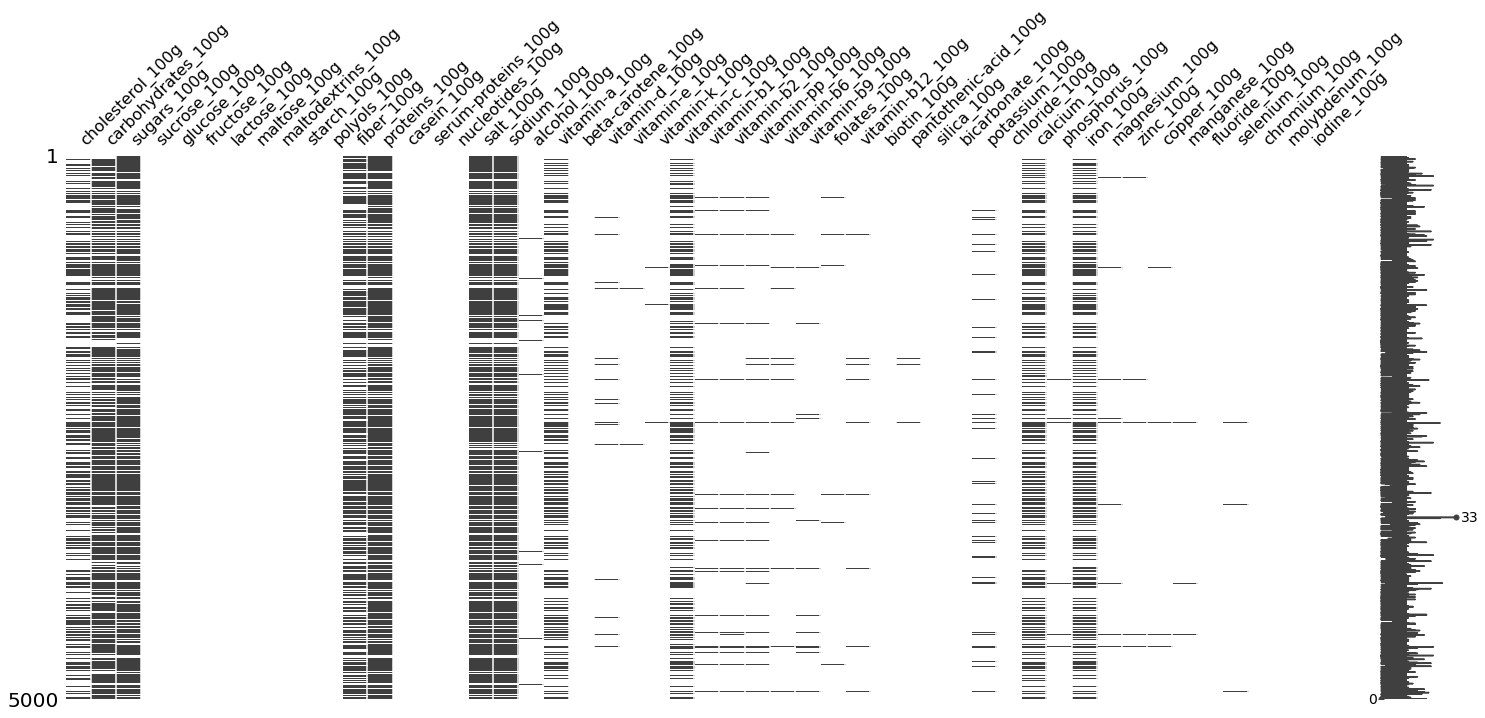

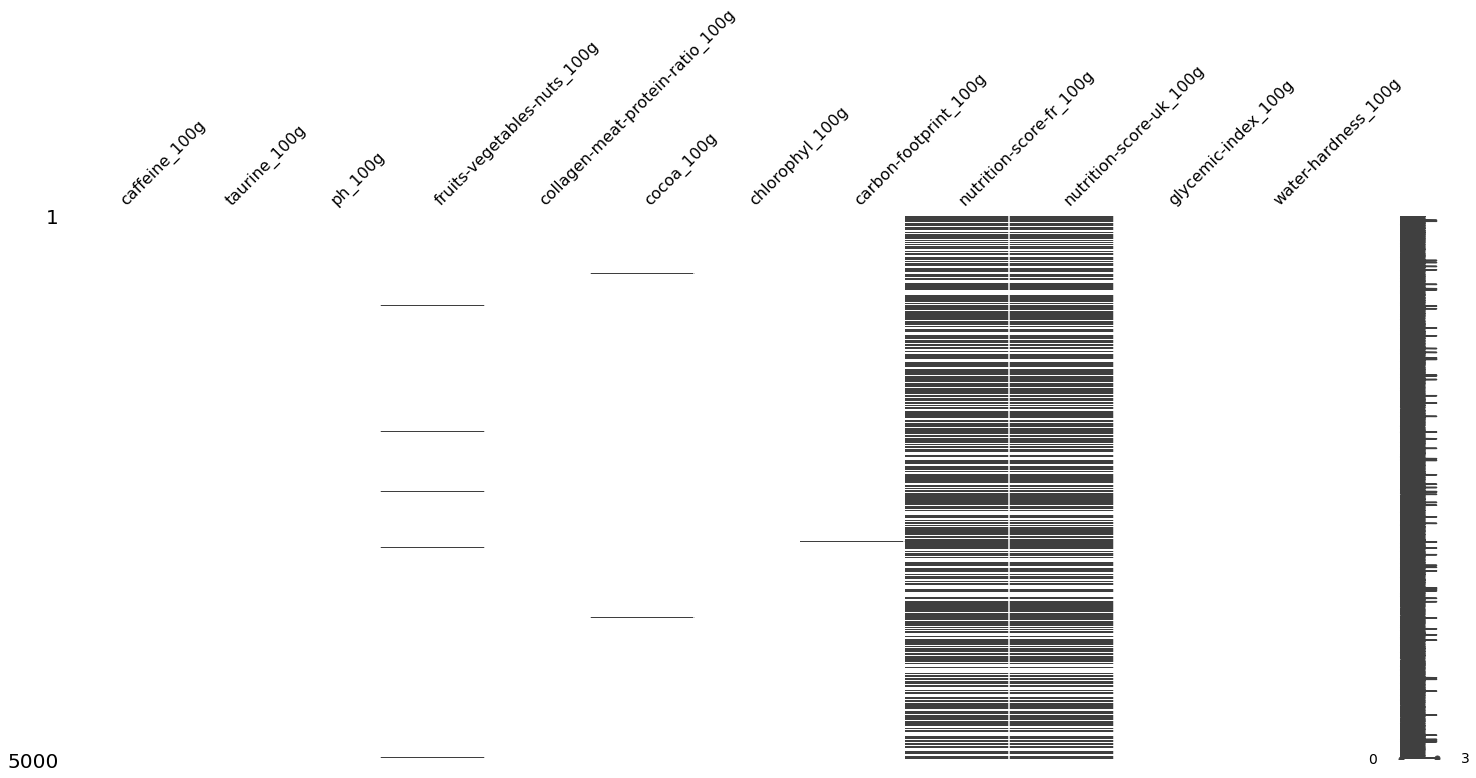

In [6]:
# Overall look at missing values
for i in range(4):
    msno.matrix(dt.iloc[:, (i*50):((i+1)*50)].sample(5000))

Some columns are very well filled : 

+ code
+ url
+ creator
+ created_t
+ created_datetime
+ last_modified_t
+ last_modified_datetime
+ product_name
+ brands
+ brands_tags
+ countries
+ countries_tags
+ countries_fr
+ ingredients_text
+ serving_size
+ additives_n
+ additives
+ additives_tags
+ additives_fr
+ ingredients_from_palm_oil_n
+ ingredients_that_may_be_from_palm_oil_n
+ nutrition_grade_fr
+ pnns_groups_1 (Programme National Nutrition Santé 1)
+ pnns_groups_2 (Programme National Nutrition Santé 1)
+ states
+ states_tags
+ states_fr
+ main_category
+ main_category_fr
+ energy_100g
+ fat_100g
+ satured-fat_100g
+ cholesterol_100g
+ carbohydrates_100g
+ sugars_100g
+ fiber_100g
+ proteins_100g
+ salt_100g
+ sodium_100g
+ vitamin-a_100g
+ vitamin-c_100g
+ calcium_100g
+ iron_100g
+ nutrition-score-fr_100g
+ nutrition-score-uk_100g

Going into details :

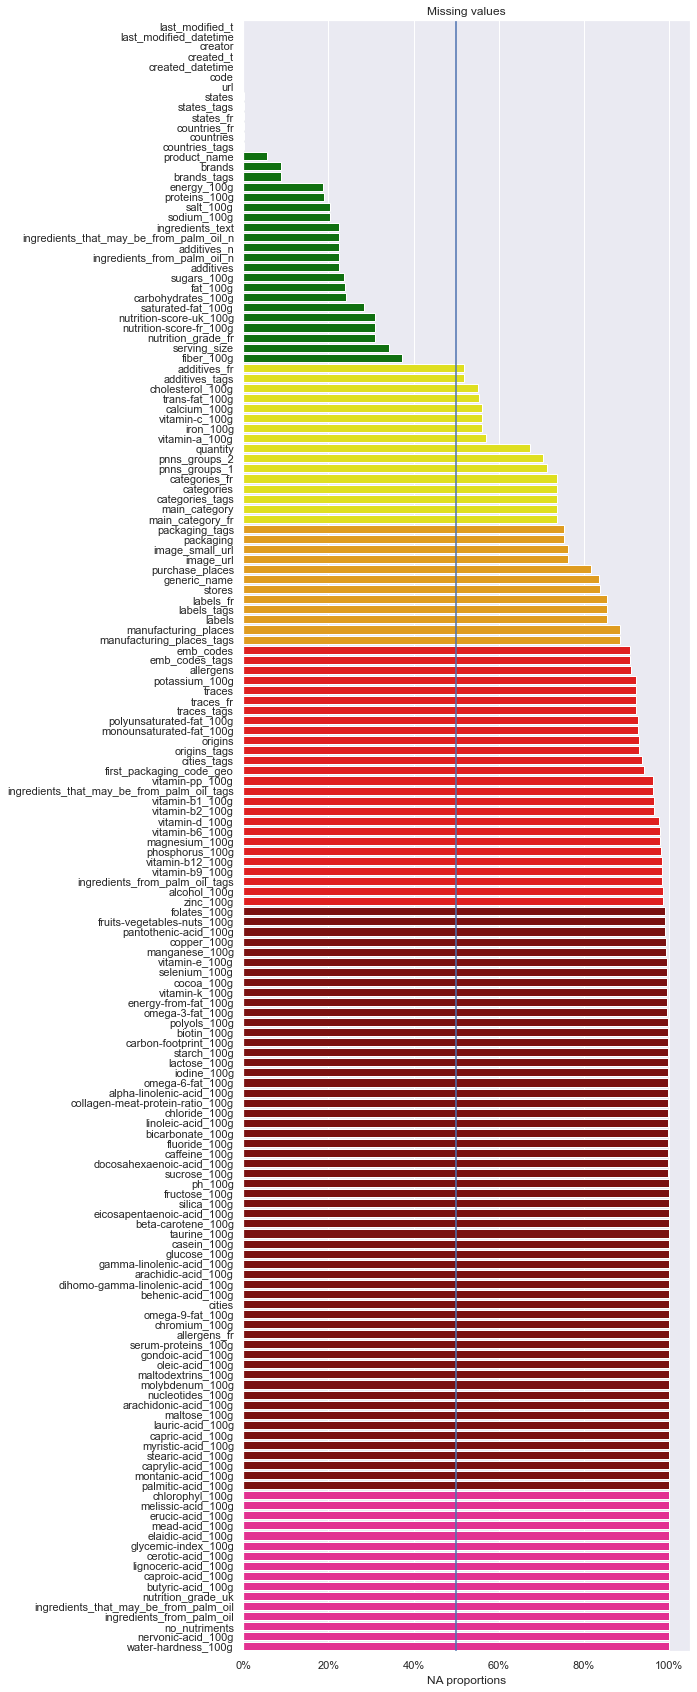

In [7]:
na_inspection = (dt.isna().sum(axis=0)/len(dt)).sort_values()

# Color code : 
colors = ['yellow' if v > 0.50 else 'green' for v in na_inspection ]
colors = ['orange' if v > 0.75 else c for c, v in zip(colors, na_inspection) ]
colors = ['red' if v > 0.90 else c for c, v in zip(colors, na_inspection) ]
colors = ['darkred' if v > 0.99 else c for c, v in zip(colors, na_inspection) ]
colors = ['deeppink' if v == 1 else c for c, v in zip(colors, na_inspection) ]

sns.set(rc = {'figure.figsize':(8,30)})
ax = sns.barplot(x=na_inspection.values * 100, y=na_inspection.index, 
            palette = colors, orient = 'h')
plt.axvline(50, 0, 160)
ax.set(title="Missing values")
ax.set_xlabel('NA proportions')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

In [8]:
for threshold in [0.99, 0.90, 0.75, 0.5]:
    print("Columns with more than {:.0f} % of NaN => {:.0f} %".format(100 * threshold, 100 * sum(na_inspection > threshold) / len(na_inspection)))

Columns with more than 99 % of NaN => 46 %
Columns with more than 90 % of NaN => 62 %
Columns with more than 75 % of NaN => 69 %
Columns with more than 50 % of NaN => 79 %


Lot of columns where missing values are very common. 

For the project, we are going to keep product's categories. And, remove all features that are less than 50% filled (difficult to use and imputation might be meaningless).

In [9]:
to_keep = list(na_inspection[na_inspection < 0.5].index)
to_keep.append('main_category')

# Remove some other columns not usefull for our purpose
to_remove = ['last_modified_t', 'creator', 'created_t', 'url', 'states', 'states_tags', 'states_fr', 'countries_fr', 'countries', \
 'ingredients_text', 'additives', 'nutrition-score-uk_100g','serving_size']

[to_keep.remove(x) for x in to_remove]

dt_reduced = dt[to_keep].copy()

## Check for duplicates

In [10]:
print('Duplicated lines ? ' + str(any(dt_reduced.duplicated())))
dt_reduced[np.array(dt_reduced.duplicated(keep=False))]

print('Duplicated code ? ' + str(any(dt_reduced['code'].duplicated())))
dt_reduced[np.array(dt_reduced['code'].duplicated(keep=False))]
# Sometime, lines are not well filled (e.g., created_t = localities...) to be removed.

dt_reduced.drop_duplicates(subset=['code'], inplace = True)

Duplicated lines ? True
Duplicated code ? True


## Change columns types

In [11]:
dt_reduced['created_datetime'] = pd.to_datetime(dt_reduced['created_datetime'], errors='coerce')
dt_reduced['last_modified_datetime'] = pd.to_datetime(dt_reduced['last_modified_datetime'], errors='coerce')

dt_reduced.dtypes

last_modified_datetime                     datetime64[ns, UTC]
created_datetime                           datetime64[ns, UTC]
code                                                    object
countries_tags                                          object
product_name                                            object
brands                                                  object
brands_tags                                             object
energy_100g                                            float64
proteins_100g                                          float64
salt_100g                                              float64
sodium_100g                                            float64
ingredients_that_may_be_from_palm_oil_n                float64
additives_n                                            float64
ingredients_from_palm_oil_n                            float64
sugars_100g                                            float64
fat_100g                                               

<AxesSubplot:>

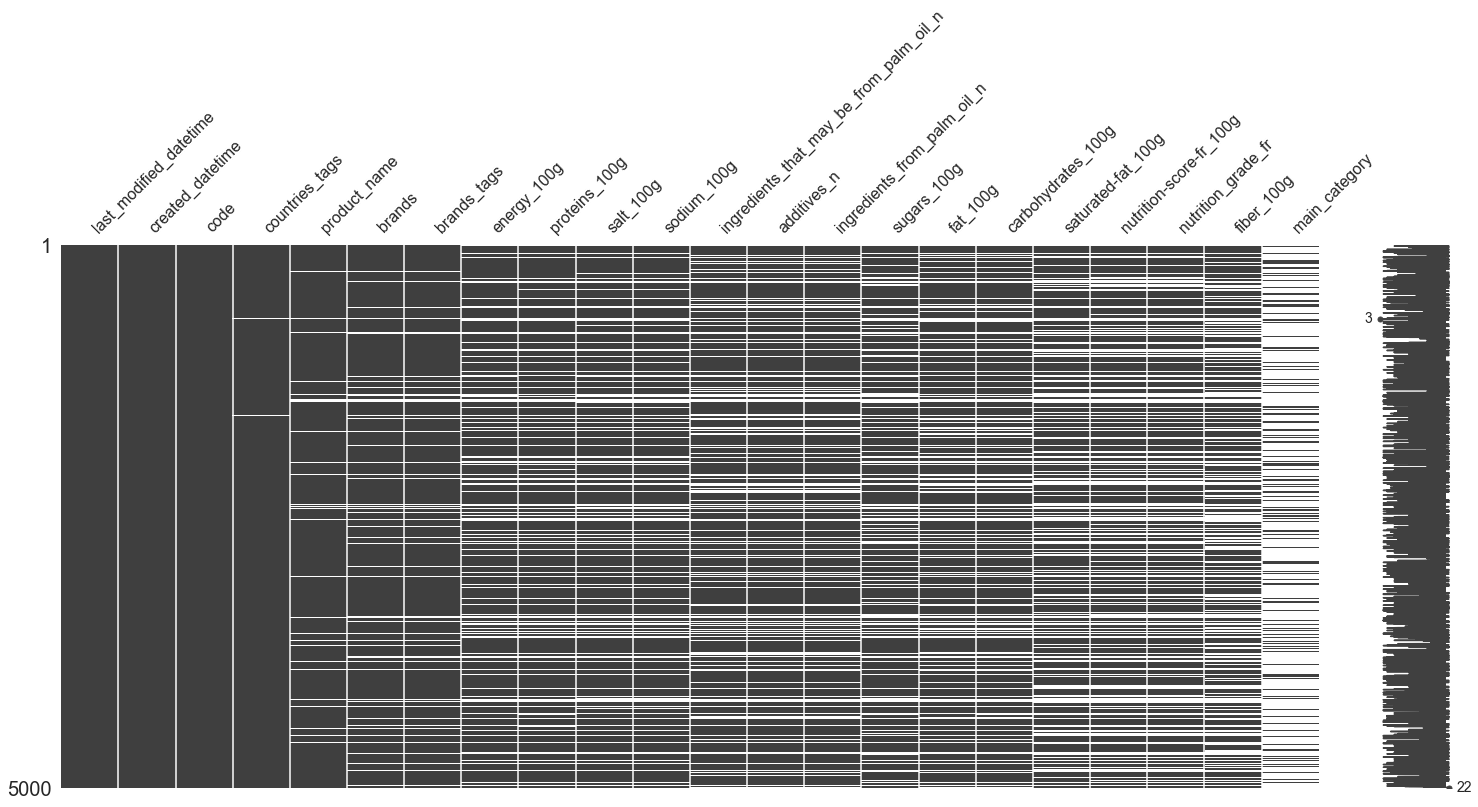

In [12]:
# Look at missing value 
msno.matrix(dt_reduced.sample(5000))

## Check _100g columns content

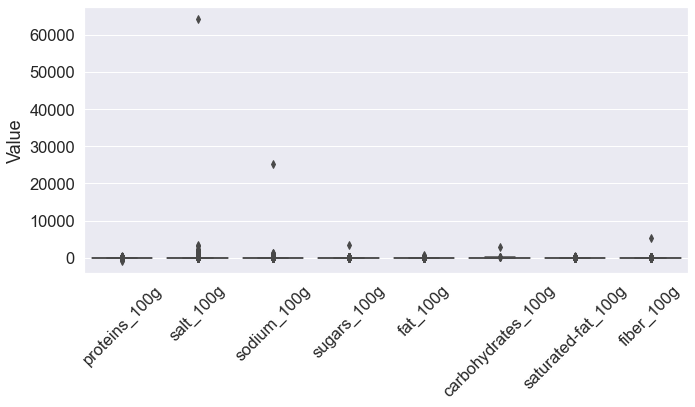

In [13]:
sns.set(rc = {'figure.figsize':(10,6)}, font_scale = 1.5)

for_plot = pd.melt(dt_reduced.filter(regex=('.*_100g|code')), id_vars = ['code'])
# for_plot

ax = sns.boxplot(y="value", x = "variable" ,data = for_plot[(for_plot['variable'] != "energy_100g") &\
                                                            (for_plot['variable'] !="nutrition-score-fr_100g")])
ax.set_ylabel('Value')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
ax.get_figure().savefig('./figs/boxplot_before_net.png')

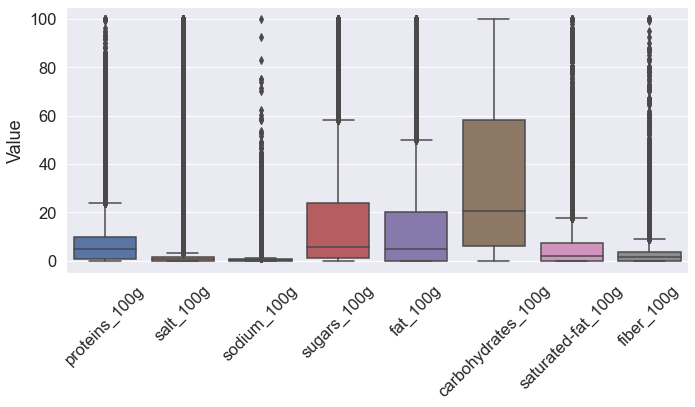

In [14]:
# Replace errors by NaN

## For _100g columns that should be between 0 and 100
col_subset = [x for x in dt_reduced.columns if '_100g' in x and not 'energy' in x and not 'nutrition-score' in x]

dt_reduced[col_subset] = dt_reduced[col_subset].where((dt_reduced[col_subset] >= 0) & (dt_reduced[col_subset] <= 100),
                                                      np.nan) 

for_plot = pd.melt(dt_reduced.filter(regex=('.*_100g|code')), id_vars = ['code'])

ax = sns.boxplot(y="value", x = "variable" ,data = for_plot[(for_plot['variable'] != "energy_100g") & \
                                                            (for_plot['variable'] != "nutrition-score-fr_100g")])
ax.set_ylabel('Value')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
ax.get_figure().savefig('./figs/boxplot_after_net.png')

Text(0.5, 0, '')

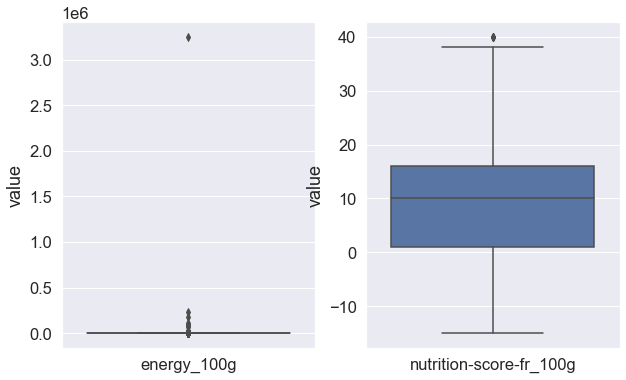

In [15]:
# Energy & Score plots
fig, ax = plt.subplots(1,2)

p = sns.boxplot(y="value", x = "variable" ,data = for_plot[for_plot['variable'] == "energy_100g"], ax = ax[0])
p.set_xlabel('')
p = sns.boxplot(y="value", x = "variable" ,data = for_plot[for_plot['variable'] == "nutrition-score-fr_100g"], ax = ax[1])
p.set_xlabel('')

Text(0.5, 0, '')

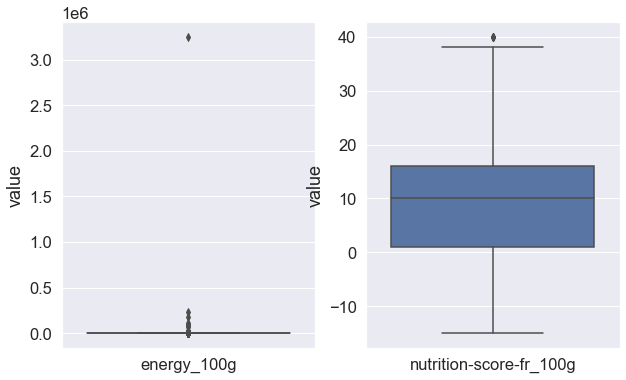

In [16]:
# Energy per 100g is given in kJ (1 kJ = 0.239 kcal), per 100g, the max energy is for 100g of fat, knowing that 1g of fat is 9kcal.
# Then energy per 100g must be below 900 kcal (i.e. approx. 3766 kJ)

dt_reduced['energy_100g'] = dt_reduced['energy_100g'].where( (dt_reduced['energy_100g'] >= 0) & (dt_reduced['energy_100g'] <= 3766),
                                                              np.nan) 

# Nutriscore is computed from product's content and should be between -15 and 40
dt_reduced['nutrition-score-fr_100g'] = dt_reduced['nutrition-score-fr_100g'].where( (dt_reduced['nutrition-score-fr_100g'] >= -15) & (dt_reduced['nutrition-score-fr_100g'] <= 40),
                                                              np.nan) 

fig, ax = plt.subplots(1,2)
p = sns.boxplot(y="value", x = "variable" ,data = for_plot[for_plot['variable'] == "energy_100g"], ax = ax[0])
p.set_xlabel('')
p = sns.boxplot(y="value", x = "variable" ,data = for_plot[for_plot['variable'] == "nutrition-score-fr_100g"], ax = ax[1])
p.set_xlabel('')

## Check row sums

As informations on product's content will be used later, we start by deleting rows where more than half of per 100g columns are NaN.


Then, although we kept only a subset of per 100g columns. Let's check if content sum is well <= 100g.
Note, sugar are subset of carbohydrates, saturated_fat a subset of fat, and sodium is computed from salt and should be < to salt. 

Thus, we are going to check four conditions : 
- Sum must be <= 100
- sugar must be <= carbohydrates
- saturated_fat must be <= fat
- sodium must be <= salt

In [17]:
# Remove rows with more than 50% NaN is per 100g columns
to_remove = dt_reduced[ col_subset ].apply( lambda x : sum(x.isna()) / len(x) > 0.5 , axis = 1)
print("{} rows will be remove (low features filling) - {:.0f} %".format(sum(to_remove), 100*sum(to_remove)/len(to_remove)))

dt_reduced = dt_reduced[~to_remove]

63747 rows will be remove (low features filling) - 20 %


<AxesSubplot:ylabel='Count'>

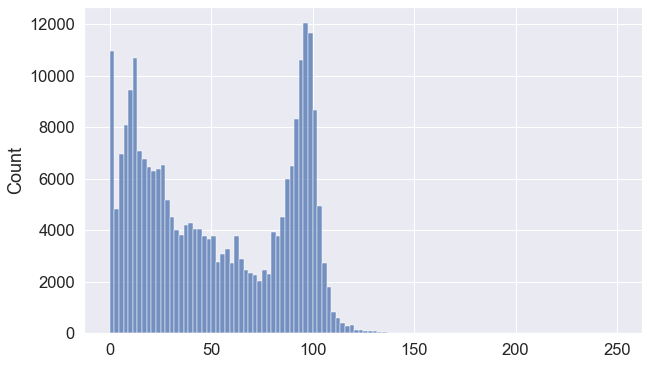

In [18]:
# Compute sum() over per 100 columns (excluding columns that are included in others)
col_subset_shorten = [x for x in col_subset if 'sugar' not in x and 'saturated' not in x and 'sodium' not in x]
dt_sums = dt_reduced[ col_subset_shorten ].apply(lambda x : pd.DataFrame.sum(x), axis = 1)

sns.histplot(x = dt_sums)

In [19]:
# Some are above 100 -> must be removed.

to_remove = dt_sums > 100
to_remove_2 = (dt_reduced['saturated-fat_100g'] > dt_reduced['fat_100g']) |\
              (dt_reduced['sugars_100g'] > dt_reduced['carbohydrates_100g']) |\
              (dt_reduced['sodium_100g'] > dt_reduced['salt_100g']) 

to_remove = to_remove | to_remove_2

print("{} rows will be remove (unrespected constraints) - {:.0f} %".format(sum(to_remove), 100*sum(to_remove)/len(to_remove)))

dt_reduced = dt_reduced[~to_remove]

22449 rows will be remove (unrespected constraints) - 9 %


<AxesSubplot:ylabel='Count'>

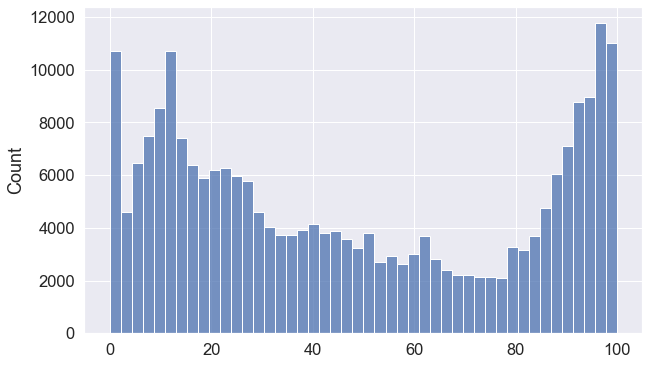

In [20]:
dt_sums = dt_reduced[ col_subset_shorten ].apply(lambda x : pd.DataFrame.sum(x), axis = 1)
sns.histplot(x = dt_sums)

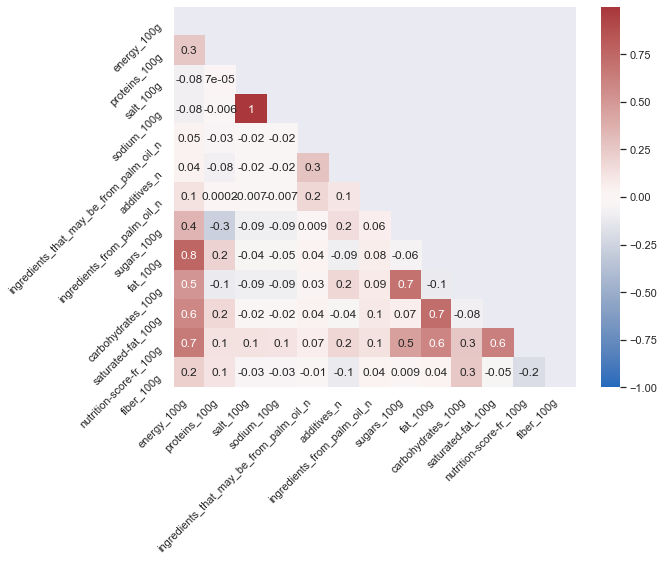

In [21]:
# Look at correlations
cors = dt_reduced.corr()
sns.set(rc = {'figure.figsize':(9,7)})

mask = np.zeros_like(cors, dtype=bool)
mask[np.triu_indices_from(mask)] = True

p=sns.heatmap(cors, vmin=-1, mask = mask, cmap=sns.color_palette("vlag", as_cmap=True), annot=True, fmt='.1g')
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right');
p.set_yticklabels(p.get_yticklabels(), rotation=45, verticalalignment='top');

Nutriscore (ici) : est le score calculé - plus le score est petit, plus le grade est bon. 

Première constatation : nutriscore est corrélé à (i) presence de matière grasse (fat, saturated_fat), de sucres (sugars, carbonhydrates), et dans une moindre mesure, présence de protéines et d'ingrédients issus de l'huile de palme. 

Seconde constation: groupes bien identifiés -> (i) les matières grasses (fat, saturated_fat), (ii) les sucres (carbonhydrates, sugars), a noter : (i) & (ii) également bien liés à energie et nutrition score. 

Troisième constation : sel et sodium, sont complétement corrélés (attendu : sel = 2.54 x sodium).

Finalement, la présence d'additifs est corrélé à la présence d'ingredients issus ou probablement issus de l'huile de palme. Aussi, la présence de protéines est corrélée (légèrement) avec la présence de graisse. 

In [22]:
1-sum(dt_reduced['salt_100g'].isna() == dt_reduced['sodium_100g'].isna()) / dt_reduced.shape[0]

0.0006565652259181709

Only some missing values for one or the other. May remove one column or the other later.

### Filling NA

Let's use different strategy depending on columns to fill in.

- Fiber : most likely, NaN are actually zeros (indeed, fiber content is not indicated on product when absent). Thus, let's replace NaN by 0 for fiber_100g
- Highly correlated features : (i) sodium/salt (for that one, only sometimes NA for not but not for the other). Because these are highly correlated, let's use the InterativeImputer from sklearn (remember, filling is based here on linear regression among features)
- Others features : let's use the knn imputer for these last ones.

In [23]:
# Define functions for conveniance

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Simple inputer (could also use pd.fillna())
def simple_imputation(X, cols, strategy, constant = None):
    X_ = X.copy()
    if strategy == 'constant' and constant is not None:
        imp = SimpleImputer(strategy=strategy, fill_value = constant)
    else:
        imp = SimpleImputer(strategy=strategy)
    
    for c in cols:
        X_.loc[:,c] = imp.fit_transform(X[c].to_numpy().reshape(-1,1))
        
    return X_

# Iterative imputer (based on among-columns correlations)
def iterative_imputation(X, cols, mins, maxs, max_iter = 10):
    X_ = X.copy()
    imp = IterativeImputer(min_value = mins, max_value = maxs, max_iter = max_iter)
    X_.loc[:,cols] = imp.fit_transform(X_.loc[:,cols])
    
    return X_

# Using default args of KNNImputer except n_neighbors
def knn_imputation(X, cols, n_neighbors = None):
    X_ = X.copy()
    if n_neighbors is not None:
        imp = KNNImputer(n_neighbors=n_neighbors)
    else:
        imp = KNNImputer()
    X_.loc[:,cols] = imp.fit_transform(X_.loc[:,cols])
    
    return X_



In [24]:
# Simple imputation for fiber
dt_reduced = simple_imputation(dt_reduced, strategy = 'constant', constant = 0, cols = ['fiber_100g'])

# Imputation based on lm for sodium/salt
dt_reduced = iterative_imputation(dt_reduced, cols = ['sodium_100g', 'salt_100g'], mins = 0, maxs = 100)

In [25]:
# Sodium columns can be removed (fully colinear with salt)
dt_reduced.drop('sodium_100g', axis = 1, inplace = True)

In [26]:
# Knn for all others
dt_reduced = knn_imputation(dt_reduced, 
                            cols = ['energy_100g', 'proteins_100g', 'salt_100g', 'ingredients_that_may_be_from_palm_oil_n',\
                                   'additives_n', 'ingredients_from_palm_oil_n', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', \
                                   'saturated-fat_100g', 'nutrition-score-fr_100g', 'fiber_100g'])


Text(0.5, 0, '')

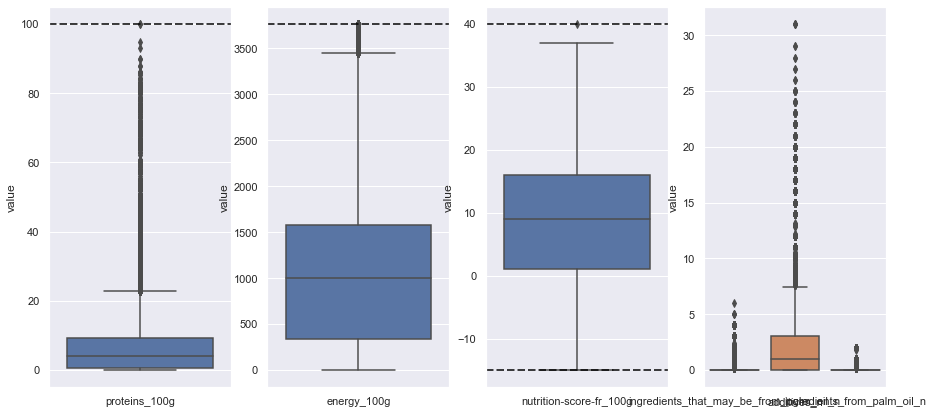

In [27]:
# Visual check

knn_subset = ['code', 'energy_100g', 'proteins_100g', 'ingredients_that_may_be_from_palm_oil_n',\
              'additives_n', 'ingredients_from_palm_oil_n', 'nutrition-score-fr_100g']

for_plot = pd.melt(dt_reduced[knn_subset], id_vars = ['code'])

sns.set(rc = {'figure.figsize':(15,7)})
fig, ax = plt.subplots(1,4)

p = sns.boxplot(y="value", x = "variable" ,
                data = for_plot[(for_plot['variable'] == "proteins_100g") ], ax = ax[0])
p.axhline(100, color="black", dashes=(5, 2))
p.set_xlabel('')

p = sns.boxplot(y="value", x = "variable" ,
                data = for_plot[(for_plot['variable'] == "energy_100g") ], ax = ax[1])
p.axhline(3766, color="black", dashes=(5, 2))
p.set_xlabel('')

p = sns.boxplot(y="value", x = "variable" ,
                data = for_plot[(for_plot['variable'] == "nutrition-score-fr_100g") ], ax = ax[2])
p.axhline(-15, color="black", dashes=(5, 2))
p.axhline(40, color="black", dashes=(5, 2))
p.set_xlabel('')

p = sns.boxplot(y="value", x = "variable" ,
                data = for_plot[for_plot['variable'].str.contains('_n') ], ax = ax[3])
p.set_xlabel('')


In [28]:
# Correction for limits ?
print("Energy : {}".format(sum( (dt_reduced['energy_100g']>3766) | (dt_reduced['energy_100g']<0)))) # ok
print("Score : {}".format(sum( (dt_reduced['nutrition-score-fr_100g']>40) | (dt_reduced['nutrition-score-fr_100g']<-15)))) # ok
print("Proteins : {}".format(sum( (dt_reduced['proteins_100g']>100) | (dt_reduced['proteins_100g']<0)))) # ok
print("Sugars : {}".format(sum( (dt_reduced['sugars_100g']>100) | (dt_reduced['proteins_100g']<0)))) # ok
print("Carbohydrates : {}".format(sum( (dt_reduced['carbohydrates_100g']>100) | (dt_reduced['proteins_100g']<0)))) # ok
print("Saturated Fat : {}".format(sum( (dt_reduced['saturated-fat_100g']>100) | (dt_reduced['proteins_100g']<0)))) # ok
print("Fat : {}".format(sum( (dt_reduced['fat_100g']>100) | (dt_reduced['proteins_100g']<0)))) # ok

(dt_reduced.filter(regex=('.*_n$')) < 0).apply(lambda x : sum(x), axis = 0) # ok.

Energy : 0
Score : 0
Proteins : 0
Sugars : 0
Carbohydrates : 0
Saturated Fat : 0
Fat : 0


ingredients_that_may_be_from_palm_oil_n    0
additives_n                                0
ingredients_from_palm_oil_n                0
dtype: int64

<AxesSubplot:ylabel='Count'>

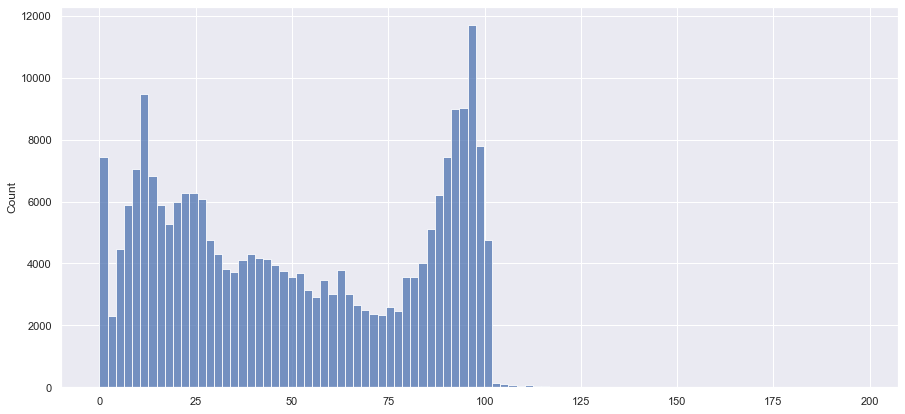

In [29]:
# Check sums
dt_sums = dt_reduced[ col_subset_shorten ].apply(lambda x : pd.DataFrame.sum(x), axis = 1)
sns.histplot(x = dt_sums)

In [30]:
to_remove = dt_sums > 100
to_remove_2 = (dt_reduced['saturated-fat_100g'] > dt_reduced['fat_100g']) |\
              (dt_reduced['sugars_100g'] > dt_reduced['carbohydrates_100g']) 

to_remove = to_remove | to_remove_2
print("{} rows will be remove (unrespected constraints) - {:.0f} %".format(sum(to_remove), 100*sum(to_remove)/len(to_remove)))

dt_reduced = dt_reduced[~to_remove]

15985 rows will be remove (unrespected constraints) - 7 %


<AxesSubplot:>

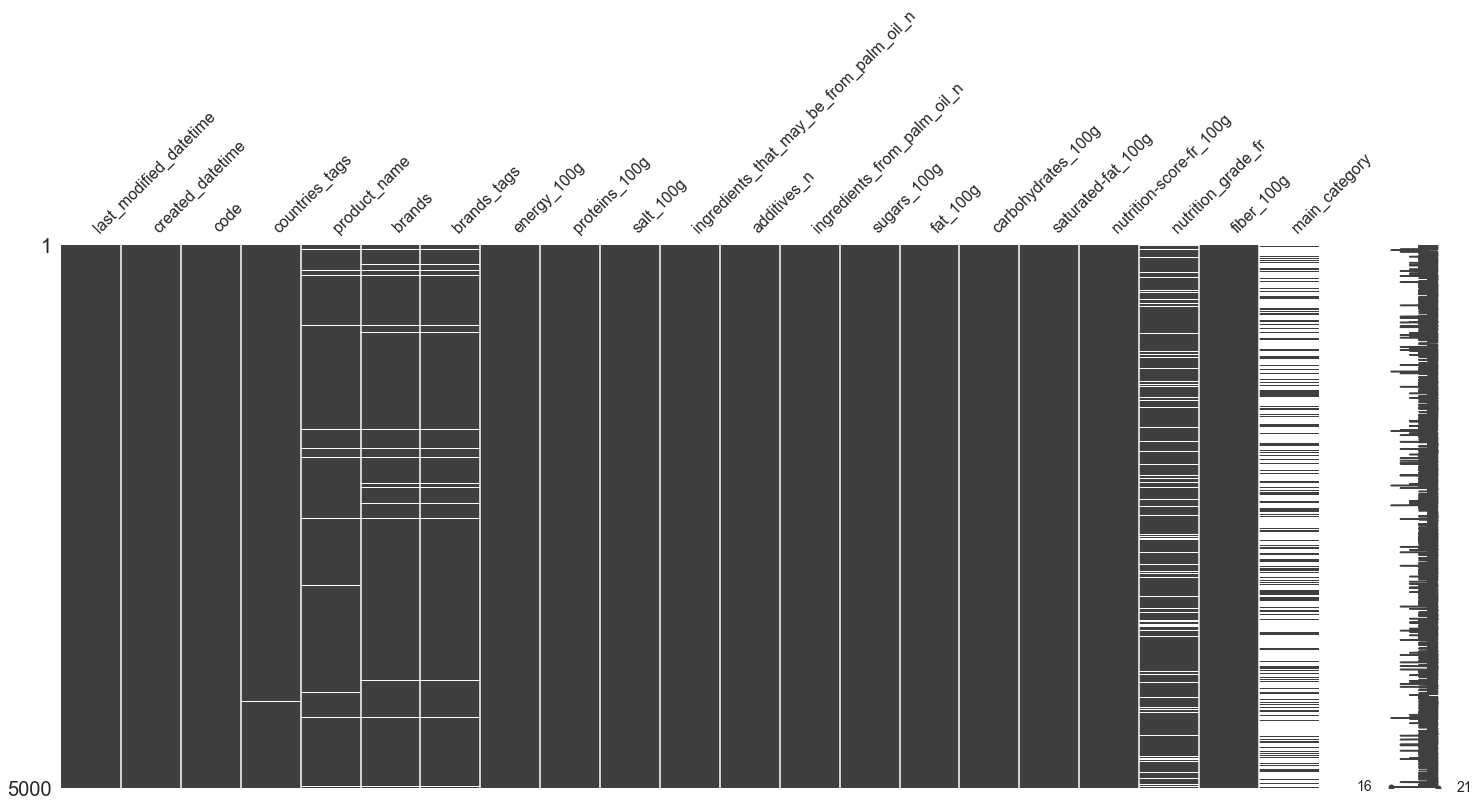

In [31]:
# Check missing again
msno.matrix(dt_reduced.sample(5000))

<AxesSubplot:>

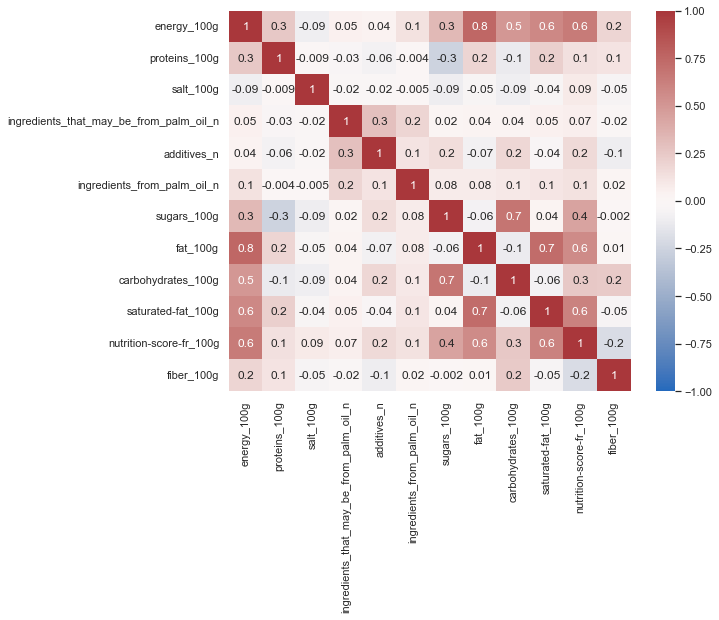

In [32]:
# Look at correlations
cors = dt_reduced.corr()
sns.set(rc = {'figure.figsize':(9,7)})
sns.heatmap(cors, vmin=-1, cmap=sns.color_palette("vlag", as_cmap=True), annot=True, fmt='.1g',)


In [33]:
# Save intermediate file (knn takes time...)
dt_reduced.to_csv('./data/clean_products.csv', index = False)

# Try some imputation for nutrition grades !
Using KNClassifier and cross-validation method. 

In [34]:
from sklearn import neighbors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Warning for dates - but will not be use later so ...
dt_reduced = pd.read_csv('./data/clean_products.csv')


C:\Users\max\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
print("Missing Nutrition Grades : {:.0f} %".format(100*sum(dt_reduced.nutrition_grade_fr.isna()) / dt_reduced.shape[0]))

Missing Nutrition Grades : 12 %


In [36]:
from sklearn import neighbors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

dt_reduced_forlearning = dt_reduced[~dt_reduced.nutrition_grade_fr.isna()]
print("Dataframe shape is {}".format(dt_reduced_forlearning.shape))
nrows = dt_reduced_forlearning.shape[0]

# Reduce dataset for speed (10% see later for more)
# - actually, not needed, it's already fast enough, let's use all the data
dt_forlearning = resample(dt_reduced_forlearning, replace = False, n_samples = int(nrows))

features = ['energy_100g', 'proteins_100g', 'salt_100g', 'ingredients_that_may_be_from_palm_oil_n',\
            'additives_n', 'ingredients_from_palm_oil_n', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', \
            'saturated-fat_100g', 'nutrition-score-fr_100g', 'fiber_100g']

X = dt_forlearning[features]
Y = dt_forlearning['nutrition_grade_fr']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size = .7)

Dataframe shape is (192413, 21)


In [37]:
# k optimization
max_k = 15
acc_train = []
acc_test = []
for k in range(2, max_k):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain, ytrain)
    acc_train.append(100*(knn.score(xtrain, ytrain)))
    acc_test.append(100*(knn.score(xtest, ytest)))

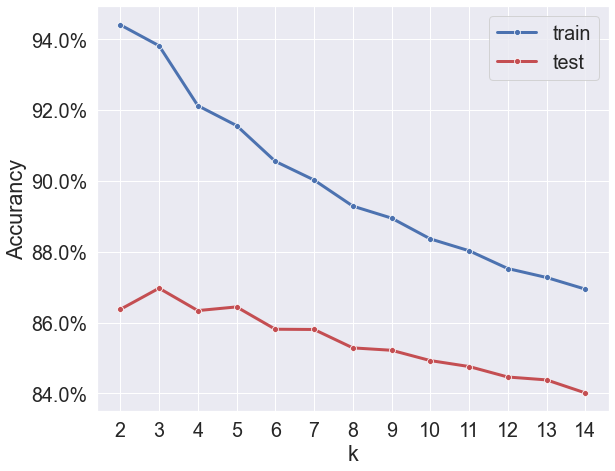

In [38]:
sns.set(font_scale = 1.8)

p = sns.lineplot(x = range(2, max_k), y = acc_train, color = 'b', linewidth = 3, marker = 'o')
p = sns.lineplot(x = range(2, max_k), y = acc_test, color = 'r', linewidth = 3, marker = 'o')
plt.legend(labels=["train","test"])

p.set_ylabel('Accurancy')
p.set_xlabel('k')
p.set(xticks=range(2, max_k))
p.yaxis.set_major_formatter(mtick.PercentFormatter());
plt.tight_layout()
p.get_figure().savefig('./figs/kclass.png')

sns.set(font_scale = 1.2)

k = 3 seems fine. 

In [39]:
from sklearn.metrics import confusion_matrix
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain, ytrain)

cmat = confusion_matrix(ytest, knn.predict(xtest), labels = ['a','b','c','d','e'])

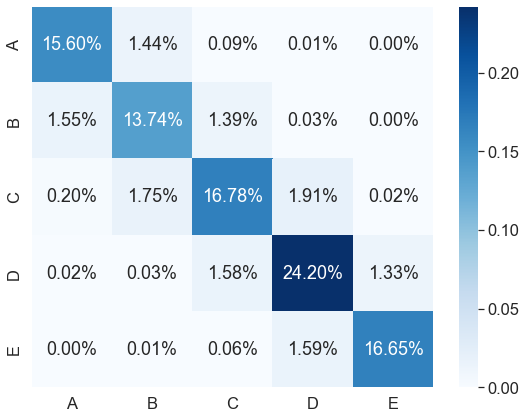

In [40]:
sns.set(font_scale = 1.5)
p = sns.heatmap(cmat/np.sum(cmat), annot=True, fmt='.2%', cmap='Blues',
               yticklabels = ['A','B','C','D','E'], xticklabels = ['A','B','C','D','E'])
p.get_figure().savefig('./figs/confusion_mat.png')

In [41]:
from collections import Counter
Counter(dt_reduced['nutrition_grade_fr'])

Counter({nan: 26156,
         'd': 52633,
         'a': 33329,
         'c': 39177,
         'b': 32009,
         'e': 35265})

Classification is accurate at 87% on test data. Let's use this for impute missing nutrition grades. 

Note: le calcul du nutriscore est basé sur les contenus pour 100g. Néanmoins, il dépend également du type d'aliments (e.g., calcul different pour les boissons ou les matières grasses). De plus des points positifs sont comptés lorsque les aliments continnent des fruits/légumes (donnée à extraire de la colonne 'ingredients text' par ex.). Finalement, le calcul du score final, dépends également de la nature des produits. Ainsi, des informations complémentaires devraient ici aider à obtenir une précision plus importante. 

In [42]:
# Impute grades
dt_reduced_forimputation = dt_reduced[dt_reduced.nutrition_grade_fr.isna()]

dt_reduced_grades_imputed = dt_reduced.copy()
dt_reduced_grades_imputed.loc[dt_reduced.nutrition_grade_fr.isna(),'nutrition_grade_fr'] = knn.predict(dt_reduced_forimputation[features])

In [43]:
dt_reduced_grades_imputed.to_csv('./data/clean_products_grades_imputed.csv', index = False)